In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns; sns.set()
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
import time


%matplotlib inline

In [2]:
cd code

/Users/tianchushu/Desktop/syntaxerror-mlpp2018/code


In [3]:
import final_connection
import final_default_grids
import final_explore_and_viz
import final_load_dfs
import final_plot
import final_preprocessing
import final_temporal
import indpv_lists as final_options
import jocojims
import final_classifier_final

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
# LOADS CSV WITH MERGED DATA WITH ACS
df = final_load_dfs.load_from_file('FINAL.csv')

#Save a clean copy for later viz purpose
viz_df = df.copy()

# FINDING BASE PROBABILITY OF RE-ENTRY
print ('Prob of re-entry within one year')
print (df['within_one'].sum()/df.shape[0])
print ('Prob of re-entry within two year')
print (df['within_two'].sum()/df.shape[0])
print (' ')


LoadedFINAL.csv
Prob of re-entry within one year
0.21966193263209594
Prob of re-entry within two year
0.2725821634674416
 


In [5]:
# DROPPING COLUMNS NOT USED IN ANALYSIS
print('DROPPING THESE COLUMNS: ', jocojims.DROP_COLS)
df = df.drop(jocojims.DROP_COLS, axis = 1)
print (' ')

# CREATING DUMMIES
print ('The following columns have been broken into dummies:' , jocojims.DUMMIES)
for dummy in jocojims.DUMMIES:
    df = final_preprocessing.dummy_variable(dummy, df)
print (' ')

# DISCRETIZATION
for category in jocojims.CATS:
    df = final_preprocessing.bin_gen(df, category, '_bin', 'suffix' )
print ('Discretizing the following variables: ', jocojims.CATS)
print (' ')

DROPPING THESE COLUMNS:  ['re_entry', 'mni_no', 'dedupe_id', 'dob', 'state', 'city', 'zip', 'release_date', 'case_no', 'booking_no', 'after_released']
 
The following columns have been broken into dummies: ['sex', 'race', 'mar_stat', 'case_type', 'arresting_agency', 'arresting_agency_type', 'bail_type', 'pri_dx_value', 'refferal_source']
 
Discretizing the following variables:  ['age', 'per_capita_income', 'poverty_stat', 'household_income', 'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18', 'SSI_income', 'grandparent_care', 'military_service', 'education_25', 'property_value_occupied', 'retirement_income', 'rent_over_income', 'bail_amt']
 


In [6]:
list(df.columns)

['booking_date',
 'bailed_out',
 'mh_treatment',
 'within_one',
 'within_two',
 'sexFEMALE',
 'sexMALE',
 'sexmissing',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'mar_statmissing',
 'case_typeCR',
 'case_typeDV',
 'case_typeJV',
 'arresting_agencyFAIRWAY P.D.',
 'arresting_agencyGARDNER P.D.',
 'arresting_agencyJOHNSON COUNTY PARK PATROL',
 "arresting_agencyJOHNSON COUNTY SHERIFF'S DEPARTMENT",
 'arresting_agencyKANSAS HIGHWAY PATROL',
 'arresting_agencyLAKE QUIVIRA P.D.',
 'arresting_agencyLEAWOOD P.D.',
 'arresting_agencyLENEXA P.D.',
 'arresting_agencyMERRIAM P.D.',
 'arresting_agencyMISSION P.D.',
 'arresting_agencyOLATHE P.D.',
 'arresting_agencyOTHER AGENCY',
 'arresting_agencyOVERLAND PARK P.D.',
 'arresting_agencyPRAIRIE VILLAGE P.D.',
 'arresting_agencyROELAND PARK P.D.',
 'arresting_agencySHAWNEE MISSION 

In [7]:
# SETTING DATES FOR SEPARATING TRAIN & TESTING DATA
end =  df['booking_date'].max()[:10]
start =  df['booking_date'].min()[:10]
middle_date = '2015-07-01'

# SPLITTING DATASET INTO TRAINING AND TESTING
train, test = final_temporal.temporal_split(df, 'booking_date', start, middle_date, end)
trainv,testv = final_temporal.temporal_split(viz_df, 'booking_date', start, middle_date, end)


# SPLITTING DEPENDENT AND INDEPENDENT VARIABLES
# within_one == come back within one year
# within_two == come back within two year
y = ['within_one', 'within_two']
x_train, x_test, y_train, y_test = final_temporal.split_data(train, test, y)

a, viz_x, b, c = final_temporal.split_data(trainv,testv, y)

In [8]:
final_options.all_var

['sexFEMALE',
 'sexMALE',
 'sexmissing',
 'mh_treatment',
 'pri_dx_valueADJUSTMENT DISORDER W/MIXED DISTURBANCE OF EMOTIONS & CONDCT',
 'pri_dx_valueADJUSTMENT DISORDER WITH ANXIETY',
 'pri_dx_valueADJUSTMENT DISORDER WITH DEPRESSED MOOD',
 'pri_dx_valueADJUSTMENT DISORDER WITH DISTURBANCE OF CONDUCT',
 'pri_dx_valueADJUSTMENT DISORDER WITH MIXED ANXIETY AND DEPRESSED MOOD',
 'pri_dx_valueADJUSTMENT DISORDER WITH MIXED EMOTIONAL FEATURES',
 'pri_dx_valueADJUSTMENT DISORDER, UNSPECIFIED',
 'pri_dx_valueADJUSTMENT REACTION WITH ANXIOUS MOOD',
 'pri_dx_valueADULT ANTISOCIAL BEHAVIOR',
 'pri_dx_valueAGORAPHOBIA WITH PANIC ATTACKS',
 'pri_dx_valueAGORAPHOBIA WITH PANIC DISORDER',
 'pri_dx_valueALCOHOL ABUSE, UNSPECIFIED',
 'pri_dx_valueALCOHOL DEPENDENCE, IN REMISSION',
 'pri_dx_valueALCOHOL DEPENDENCE, UNCOMPLICATED',
 'pri_dx_valueALCOHOL WITHDRAWAL DELIRIUM',
 'pri_dx_valueAMPHETAMINE AND OTHER PSYCHOSTIMULANT DEPENDENCE',
 'pri_dx_valueAMPHETAMINE OR RELATED ACTING SYMPATHOMIMETIC ABUSE

In [9]:
#Running on All the var including mental health and bail var
x_train = x_train[final_options.all_var]
x_test = x_test[final_options.all_var]

In [10]:
results = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'])

In [11]:
best = final_classifier_final.best_grid(results)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
24,Bag,"{'max_features': 5, 'max_samples': 5, 'n_estim...",0.6383,0.3002,0.0243,"(1.0, 0.25, 0.4)","(0.7912, 0.3956, 0.5275)","(0.5234, 0.5234, 0.5234)"
22,Boost,"{'algorithm': 'SAMME.R', 'n_estimators': 100}",0.7626,0.4451,3.4175,"(0.5495, 0.1374, 0.2198)","(0.522, 0.261, 0.348)","(0.4588, 0.4588, 0.4588)"
99,ET,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.7602,0.4247,0.8477,"(0.511, 0.1277, 0.2044)","(0.5, 0.25, 0.3333)","(0.4505, 0.4505, 0.4505)"
44,Logit,"{'C': 0.1, 'penalty': 'l1'}",0.7594,0.4292,0.4707,"(0.544, 0.136, 0.2176)","(0.489, 0.2445, 0.326)","(0.4574, 0.4574, 0.4574)"
114,NB,{},0.7182,0.3690,0.2498,"(1.0, 0.25, 0.4)","(0.7088, 0.3544, 0.4725)","(0.4382, 0.4382, 0.4382)"
15,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",0.7619,0.4336,2.2559,"(0.5604, 0.1401, 0.2242)","(0.5055, 0.2527, 0.337)","(0.4451, 0.4451, 0.4451)"
54,Tree,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.7042,0.3600,0.0636,"(0.6099, 0.1525, 0.244)","(0.5879, 0.294, 0.3919)","(0.4382, 0.4382, 0.4382)"


In [12]:
best

{'Bag': {'max_features': [5], 'max_samples': [5], 'n_estimators': [1]},
 'Boost': {'algorithm': ['SAMME.R'], 'n_estimators': [100]},
 'ET': {'criterion': ['entropy'],
  'max_depth': [5],
  'max_features': ['sqrt'],
  'min_samples_split': [2],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'Logit': {'C': [0.1], 'penalty': ['l1']},
 'NB': {},
 'RF': {'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100]},
 'Tree': {'criterion': ['gini'],
  'max_depth': [10],
  'max_features': ['sqrt'],
  'min_samples_split': [2]}}

In [13]:
df_sorting = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_one'], y_test['within_one'], best, viz_x)

Bag
Boost
ET
Logit
NB
RF
Tree


In [14]:
#Use the best performed Random Forest model to see the top 10% at risk people's data

In [15]:
RF_df = df_sorting.sort_values(by=['RF'], ascending=False)

In [16]:
RF_df.columns

Index(['SSI_income', 'after_released', 'age', 'arresting_agency',
       'arresting_agency_type', 'bail_amt', 'bail_type', 'bailed_out',
       'booking_no', 'case_no', 'case_type', 'city', 'dedupe_id', 'dob',
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mni_no', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'pri_dx_value', 'property_value_occupied', 'race', 're_entry',
       'refferal_source', 'release_date', 'rent_over_income',
       'retirement_income', 'school_enrollment_16-19', 'sex', 'state', 'zip',
       'Bag', 'Boost', 'ET', 'Logit', 'NB', 'RF', 'Tree'],
      dtype='object')

In [17]:
RF_df[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
2455,475,NaN,NaN,OLATHE P.D.,CITY,NaN,SUR,0,15010675,15DV01168,...,MALE,KS,66061,0.5,0.505578,0.523031,0.814031,1.0,0.866316,0.648000
3165,475,-4.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011447,15DV01254,...,FEMALE,KS,66061,0.5,0.506572,0.555585,0.839958,1.0,0.866258,0.465574
3164,475,134.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011447,15DV01254,...,FEMALE,KS,66061,0.5,0.504448,0.555140,0.839958,1.0,0.832696,0.465574
2191,475,1846.0,NaN,OLATHE P.D.,CITY,NaN,SUR,0,16004657,16DV00472,...,MALE,KS,66061,0.5,0.499129,0.514345,0.814031,1.0,0.832558,0.648000
7150,456,NaN,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16003822,16CR00488,...,MALE,KS,66212,0.5,0.502670,0.484212,0.730675,1.0,0.815726,0.467456
2454,475,419.0,NaN,OLATHE P.D.,CITY,NaN,SUR,0,15010675,15DV01168,...,MALE,KS,66061,0.5,0.502387,0.512844,0.814031,1.0,0.782528,0.648000
6466,437,NaN,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16003978,16CR00696,...,FEMALE,KS,66202,0.5,0.504112,0.519775,0.719110,1.0,0.772623,0.676329
6984,456,127.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16003975,16DV00371,...,MALE,KS,66212,0.5,0.504350,0.504093,0.849077,1.0,0.765244,0.766990
6465,437,NaN,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16003978,16CR00696,...,FEMALE,KS,66202,0.5,0.505227,0.530321,0.811958,1.0,0.756961,0.676329
533,407,-41.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011296,15DV01231,...,MALE,KS,66062,0.5,0.504405,0.551001,0.837882,1.0,0.751996,0.648000


In [20]:
features_to_see = ['bail_amt', 'bail_type', 'bailed_out','case_type', 'city', 
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'property_value_occupied', 'race', 're_entry', 'rent_over_income']

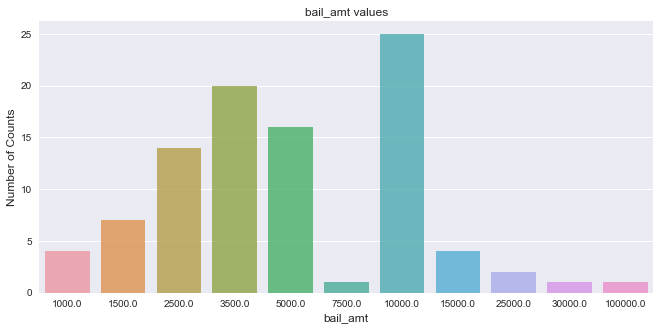

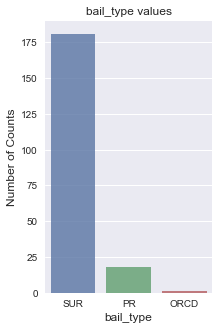

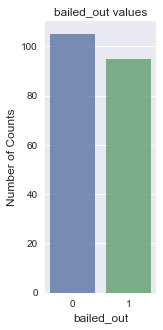

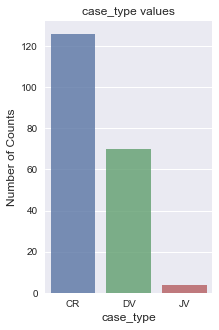

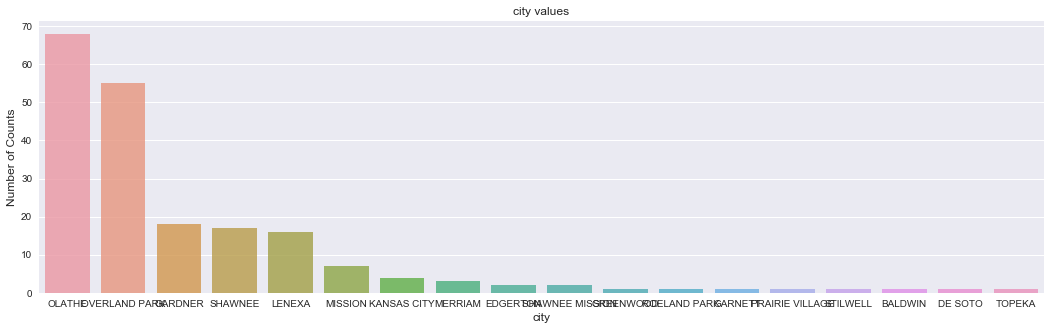

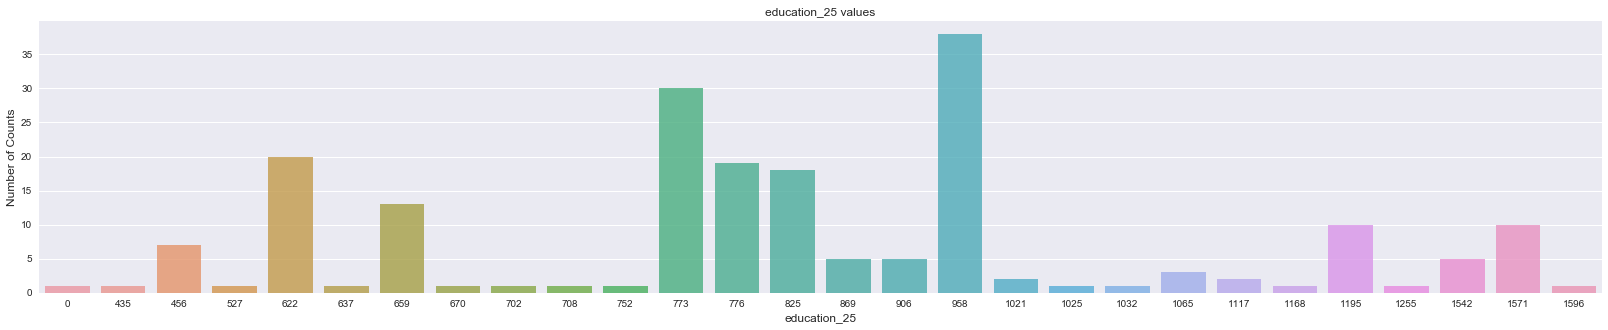

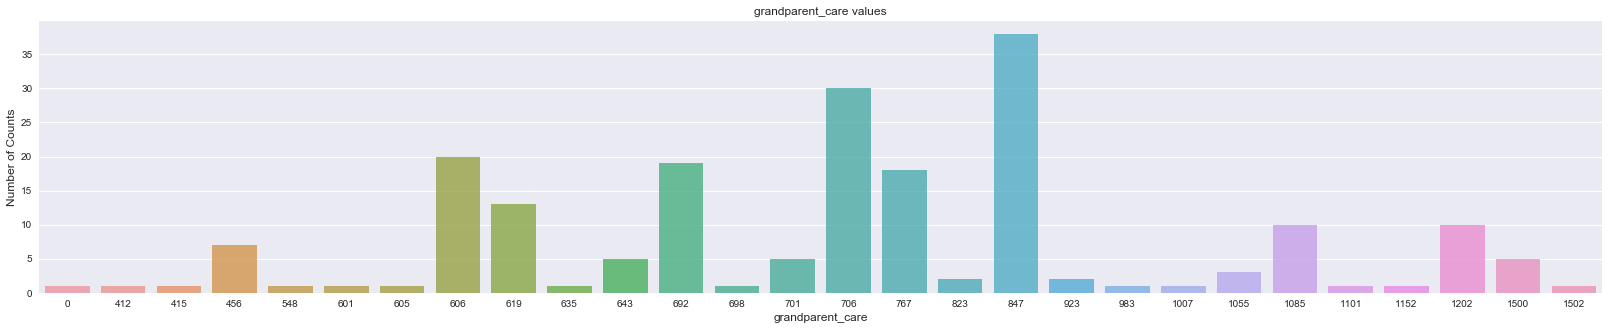

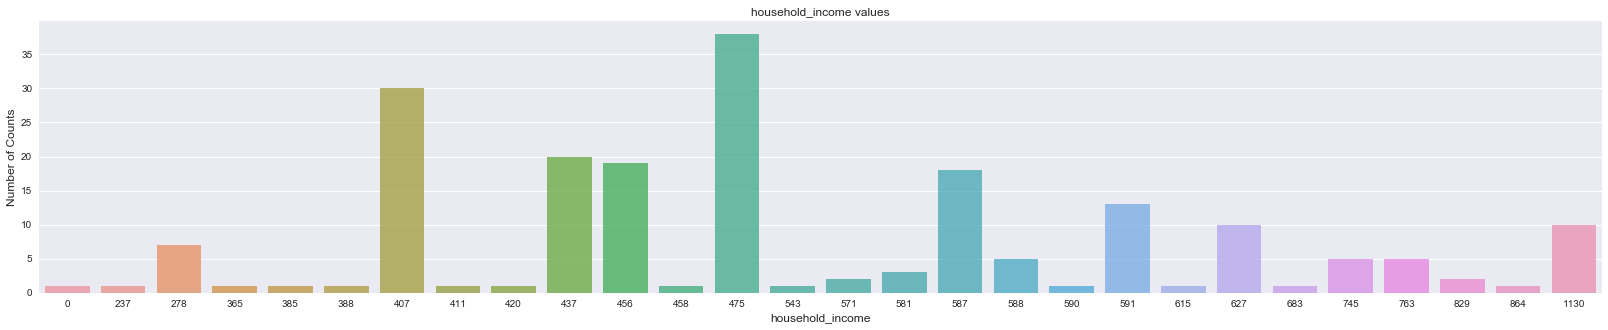

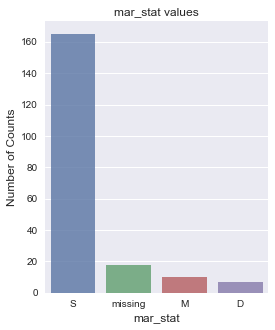

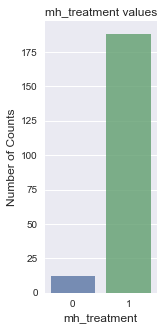

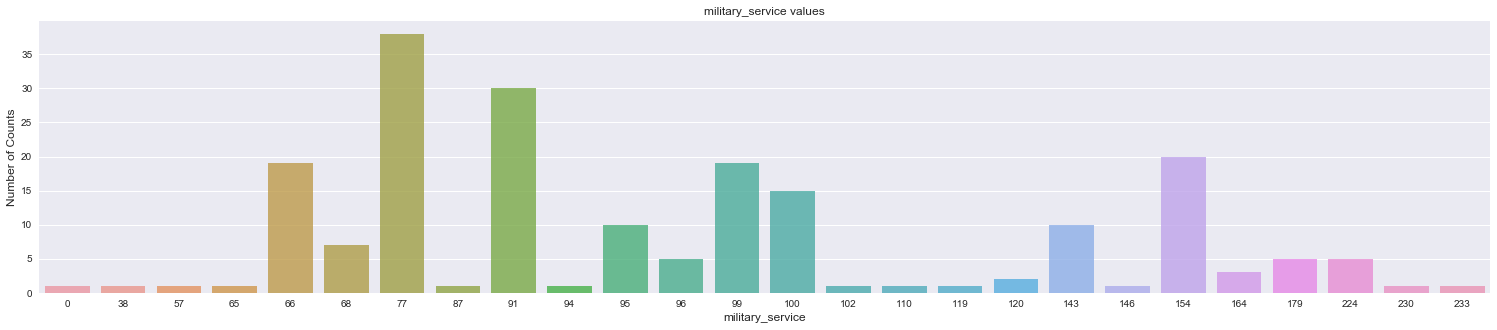

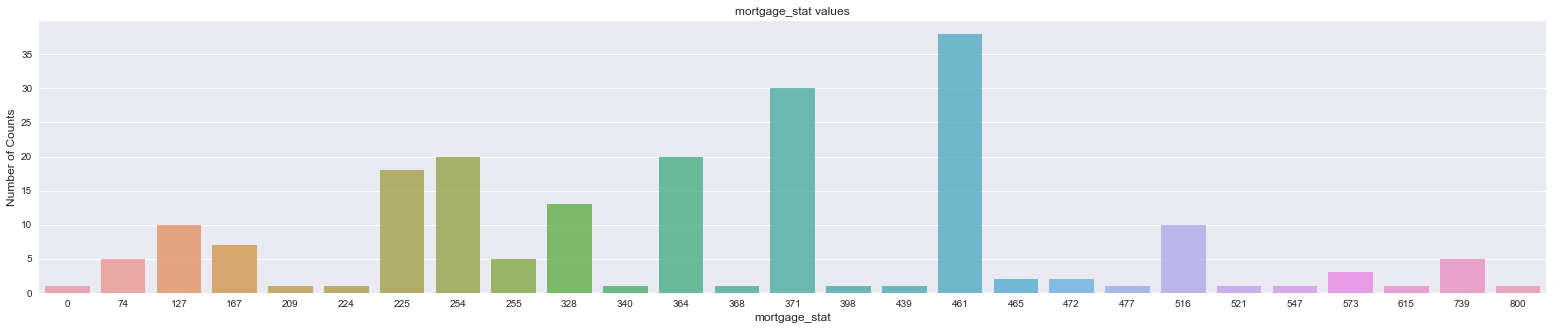

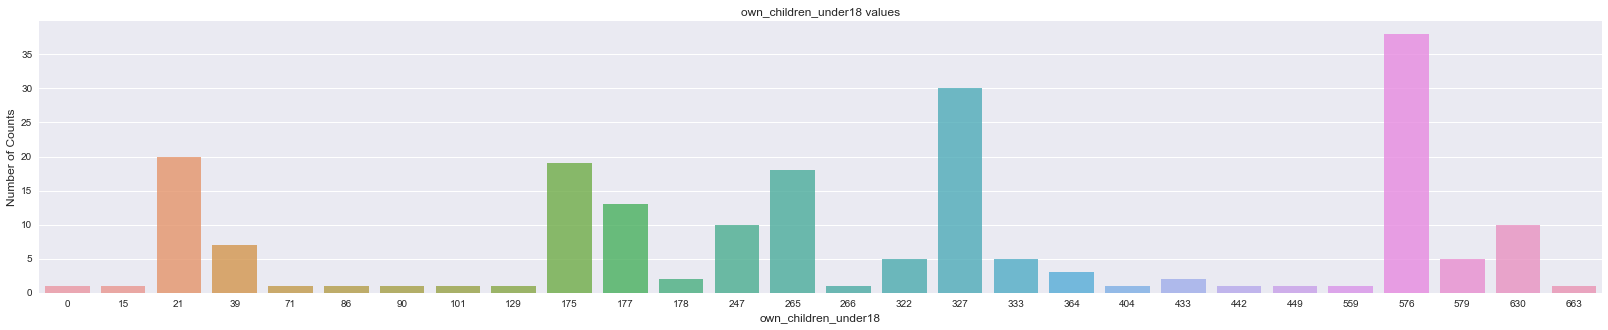

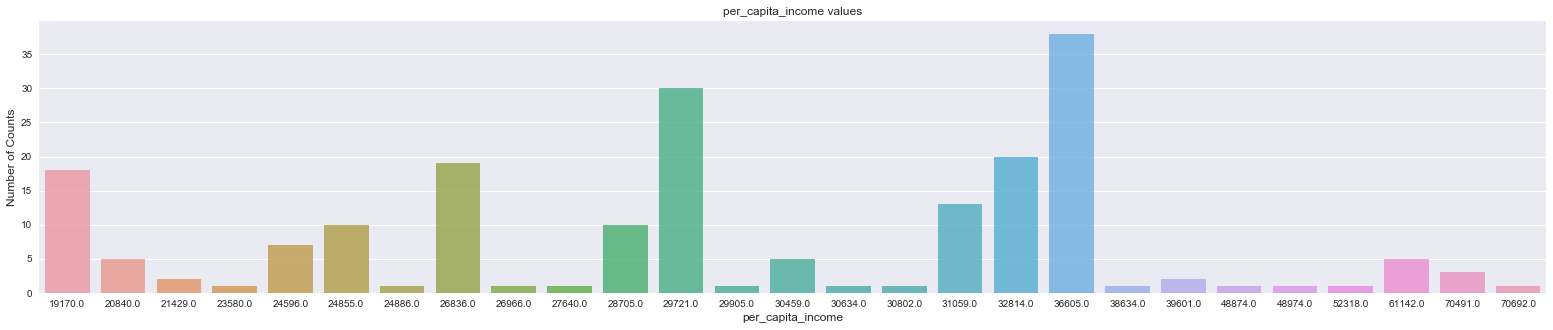

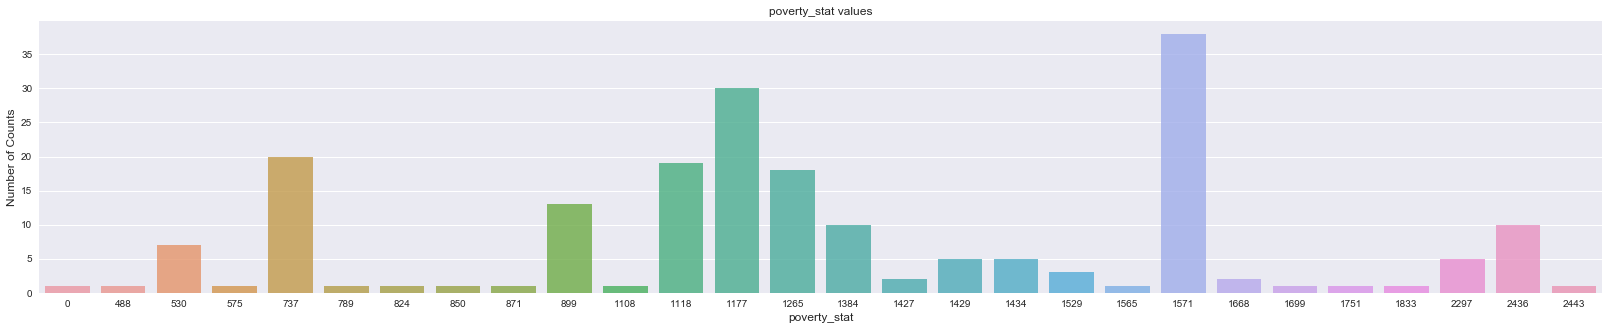

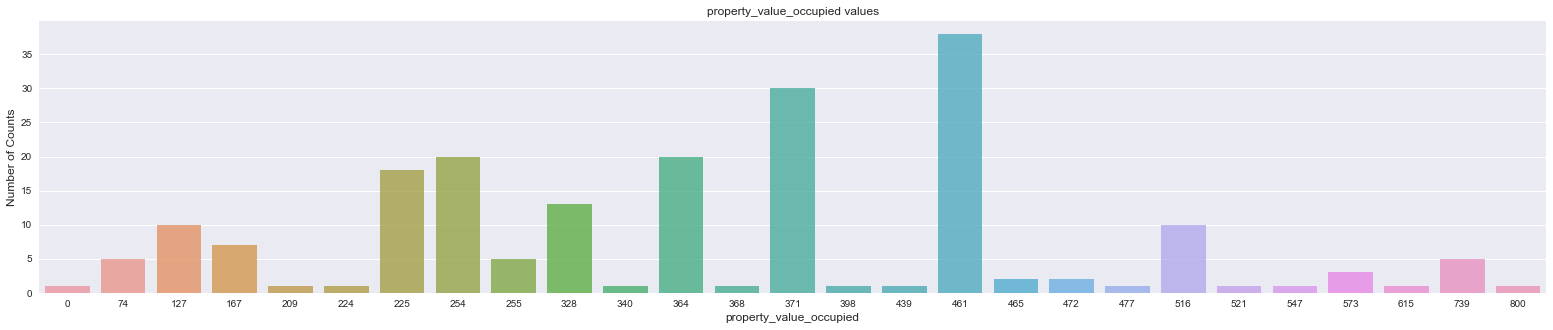

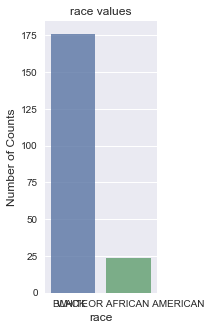

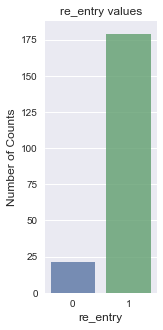

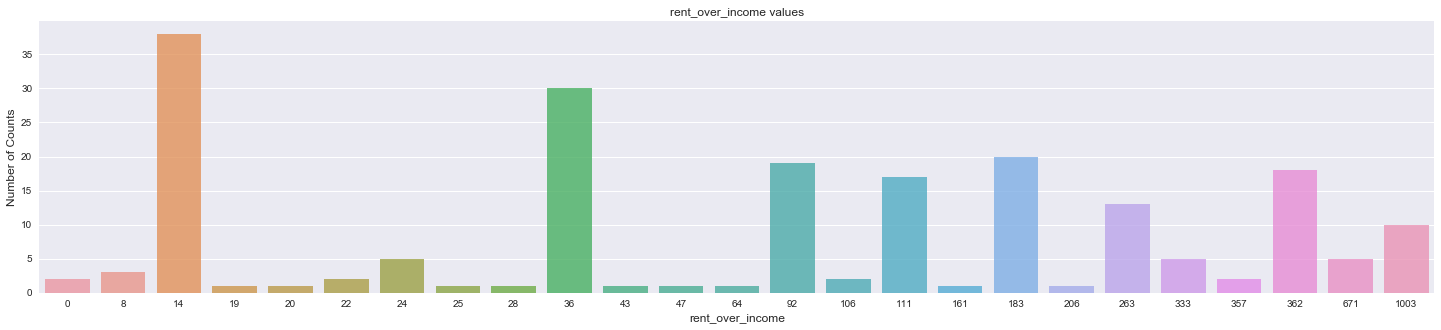

In [39]:
final_plot.plot_df(RF_df[:200], features_to_see, save=False)

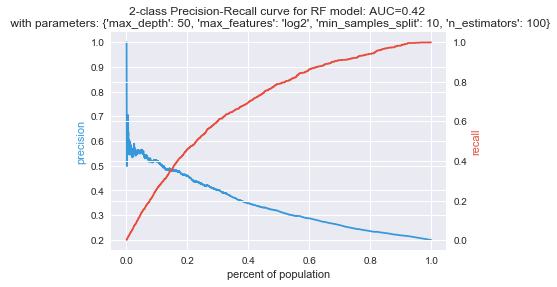

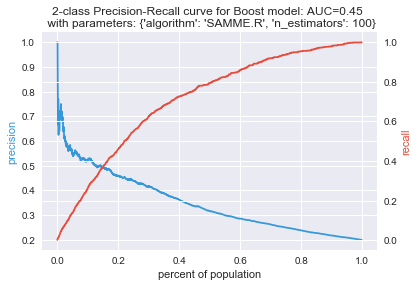

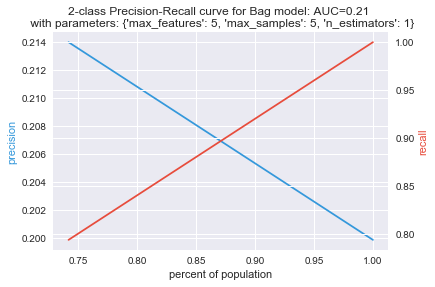

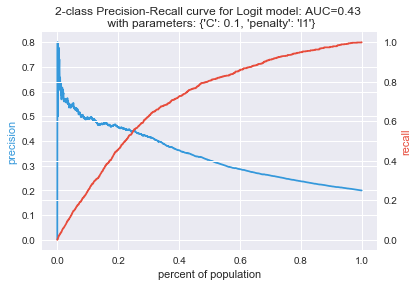

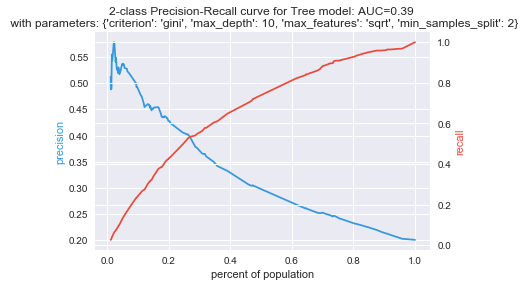

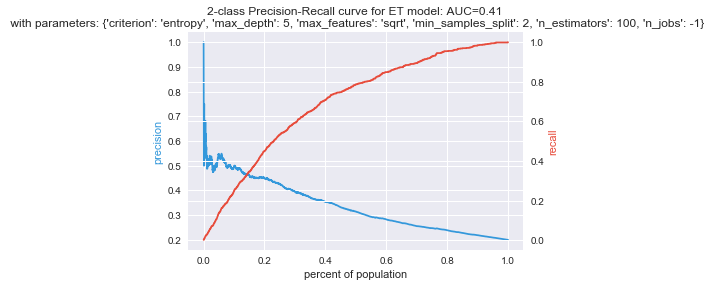

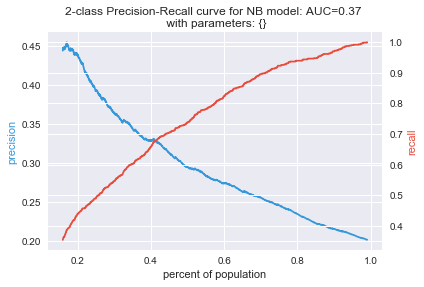

In [22]:
final_plot.plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"],  x_train, x_test, y_train['within_one'], y_test['within_one'], best)

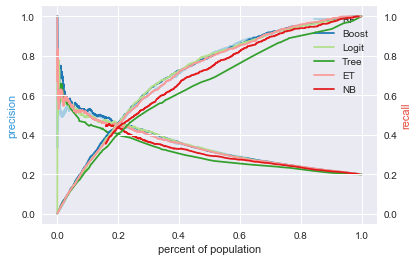

In [23]:
final_plot.plot_mult(['RF', 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'], best)

Feature ranking for within_one
1. mh_treatment (0.203327)
2. pri_dx_valueUNSPECIFIED AFFECTIVE PSYCHOSIS (0.196364)
3. refferal_sourceOTHERS (0.123797)
4. refferal_sourceSELF (0.061671)
5. bailed_out (0.054377)
6. case_typeJV (0.048546)
7. bail_typeSUR (0.048002)
8. bail_amt_bin1 (0.027148)
9. case_typeCR (0.021923)
10. bail_typePR (0.019986)
11. pri_dx_valuemissing (0.019714)
12. pri_dx_valueMANIC DEPRESSIVE PSYCHOSIS, UNSPECIFIED (0.013122)
13. age_bin4 (0.012115)
14. age_bin1 (0.010325)
15. mar_statM (0.009400)
16. pri_dx_valueDEPRESSIVE DISORDER NOS (0.008518)
17. case_typeDV (0.007258)
18. bail_amt_bin2 (0.006130)
19. mar_statS (0.006102)
20. per_capita_income_bin1 (0.005331)


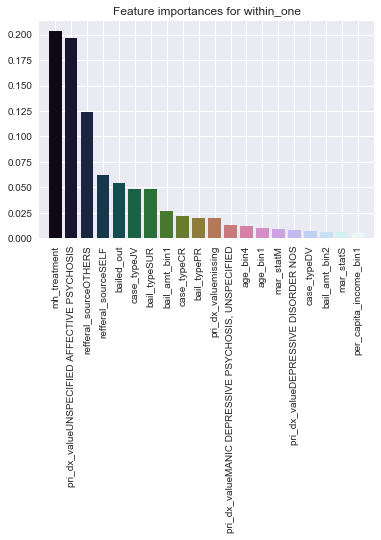

In [24]:
final_plot.feature_importance(x_train, y_train['within_one'], best, "ET",20)

In [25]:
########Running everything on second y within two year of re-entry

In [26]:
results2 = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'])

In [27]:
best2 = final_classifier_final.best_grid(results2)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
39,Bag,"{'max_features': 10, 'max_samples': 10, 'n_est...",0.6347,0.3701,0.1482,"(0.467, 0.0905, 0.1517)","(0.4368, 0.1693, 0.2441)","(0.397, 0.3078, 0.3467)"
22,Boost,"{'algorithm': 'SAMME.R', 'n_estimators': 100}",0.7577,0.5129,3.4757,"(0.6484, 0.1257, 0.2105)","(0.6071, 0.2354, 0.3392)","(0.5495, 0.426, 0.4799)"
113,ET,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.7571,0.5119,1.5920,"(0.6484, 0.1257, 0.2105)","(0.6154, 0.2386, 0.3438)","(0.5536, 0.4292, 0.4835)"
44,Logit,"{'C': 0.1, 'penalty': 'l1'}",0.7540,0.5046,0.3629,"(0.6319, 0.1225, 0.2052)","(0.5797, 0.2247, 0.3239)","(0.5371, 0.4164, 0.4691)"
114,NB,{},0.7111,0.4394,0.2334,"(1.0, 0.1938, 0.3247)","(0.7005, 0.2716, 0.3914)","(0.5192, 0.4026, 0.4535)"
11,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",0.7597,0.5124,3.4019,"(0.6484, 0.1257, 0.2105)","(0.5934, 0.23, 0.3315)","(0.5646, 0.4377, 0.4931)"
70,Tree,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.7251,0.4560,0.0642,"(0.6099, 0.1182, 0.198)","(0.6511, 0.2524, 0.3638)","(0.5481, 0.4249, 0.4787)"


In [28]:
best2

{'Bag': {'max_features': [10], 'max_samples': [10], 'n_estimators': [50]},
 'Boost': {'algorithm': ['SAMME.R'], 'n_estimators': [100]},
 'ET': {'criterion': ['entropy'],
  'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'Logit': {'C': [0.1], 'penalty': ['l1']},
 'NB': {},
 'RF': {'max_depth': [50],
  'max_features': ['sqrt'],
  'min_samples_split': [10],
  'n_estimators': [100]},
 'Tree': {'criterion': ['entropy'],
  'max_depth': [10],
  'max_features': ['sqrt'],
  'min_samples_split': [2]}}

In [29]:
viz_x.columns

Index(['SSI_income', 'after_released', 'age', 'arresting_agency',
       'arresting_agency_type', 'bail_amt', 'bail_type', 'bailed_out',
       'booking_no', 'case_no', 'case_type', 'city', 'dedupe_id', 'dob',
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mni_no', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'pri_dx_value', 'property_value_occupied', 'race', 're_entry',
       'refferal_source', 'release_date', 'rent_over_income',
       'retirement_income', 'school_enrollment_16-19', 'sex', 'state', 'zip'],
      dtype='object')

In [30]:
df_sorting2 = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_two'], y_test['within_two'], best2, viz_x)

Bag
Boost
ET
Logit
NB
RF
Tree


In [31]:
RF_df2 = df_sorting2.sort_values(by=['RF'], ascending=False)

In [32]:
RF_df2[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
3165,475,-4.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011447,15DV01254,...,FEMALE,KS,66061,0.259865,0.508655,0.942147,0.893840,1.000000e+00,0.936483,0.803245
2455,475,NaN,NaN,OLATHE P.D.,CITY,NaN,SUR,0,15010675,15DV01168,...,MALE,KS,66061,0.259865,0.506945,0.941286,0.875913,1.000000e+00,0.926124,0.803245
2325,475,47.0,19.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,15011051,15CR02267,...,MALE,KS,66061,0.317865,0.504847,0.920246,0.857570,1.000000e+00,0.919555,0.657407
3164,475,134.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011447,15DV01254,...,FEMALE,KS,66061,0.259865,0.505503,0.904449,0.893840,1.000000e+00,0.917016,0.803245
533,407,-41.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011296,15DV01231,...,MALE,KS,66062,0.220294,0.505624,0.881508,0.899859,1.000000e+00,0.903310,0.803245
2454,475,419.0,NaN,OLATHE P.D.,CITY,NaN,SUR,0,15010675,15DV01168,...,MALE,KS,66061,0.259865,0.503043,0.874052,0.867643,1.000000e+00,0.888099,0.803245
7149,456,762.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16003822,16CR00488,...,MALE,KS,66212,0.299532,0.506978,0.839294,0.812151,1.000000e+00,0.887681,0.657407
823,407,213.0,17.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,15001117,15JV01201,...,MALE,KS,66062,0.300341,0.505922,0.883163,0.904153,1.680506e-08,0.883635,0.803245
825,407,54.0,18.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16000075,15JV01406,...,MALE,KS,66062,0.300341,0.505922,0.883163,0.904153,1.680506e-08,0.883635,0.803245
5517,1130,782.0,21.0,SHAWNEE P.D.,CITY,NaN,SUR,0,15013277,15DV01461,...,MALE,KS,66215,0.266532,0.504655,0.809258,0.849903,1.000000e+00,0.879676,0.803245


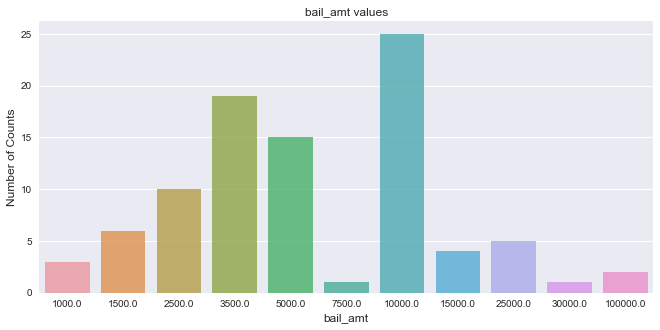

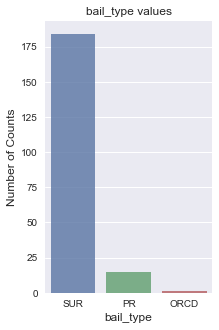

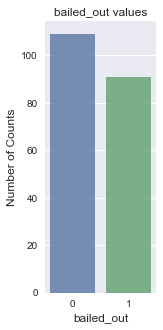

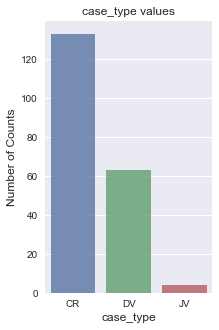

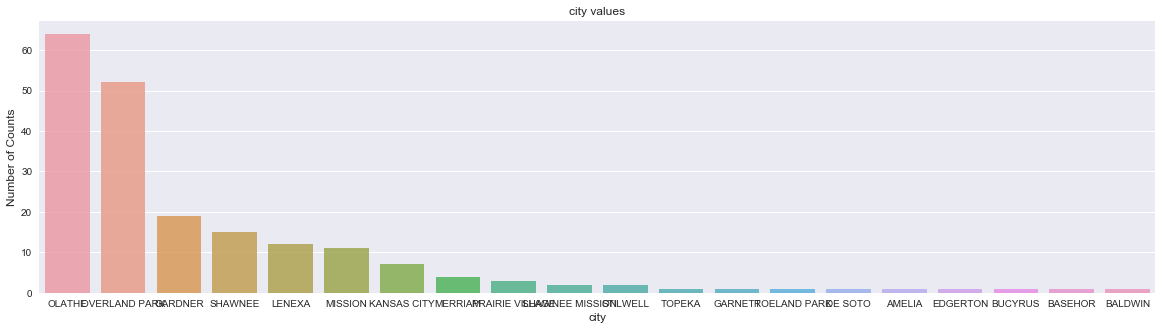

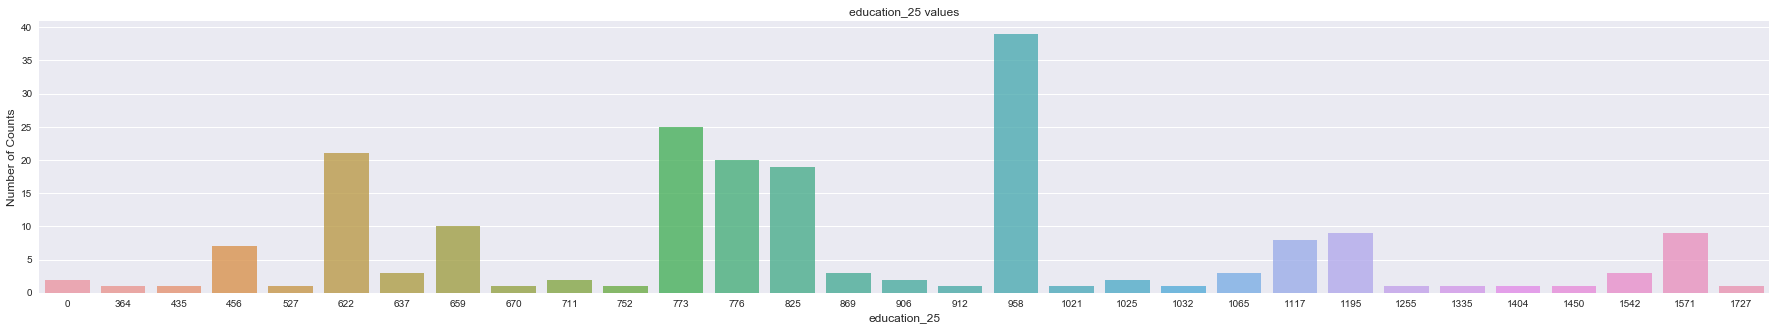

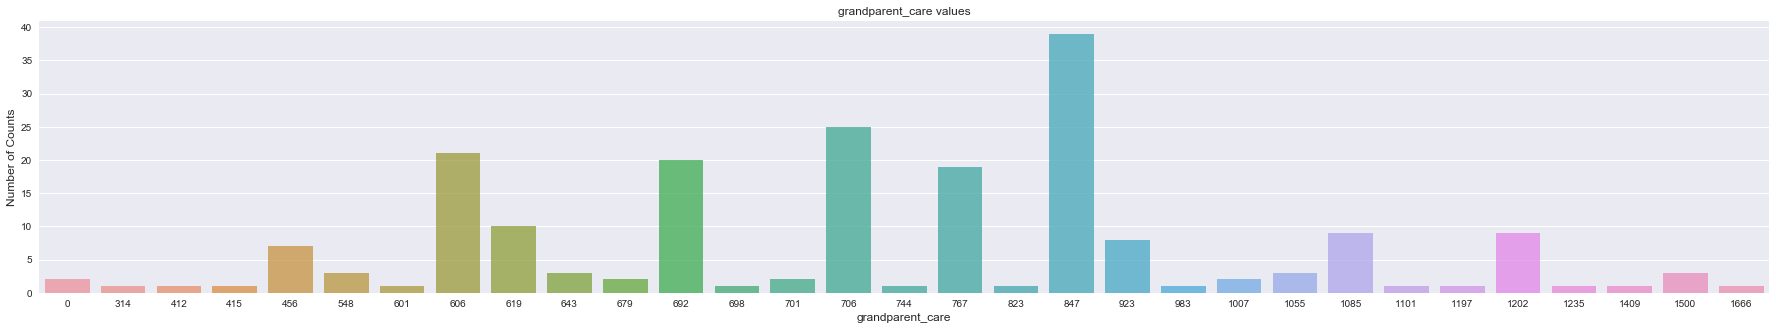

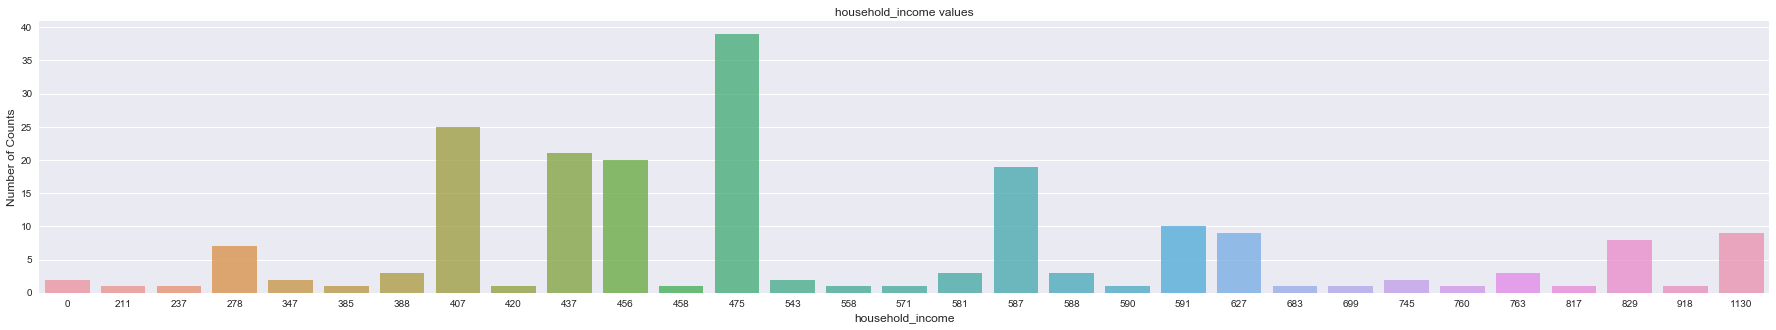

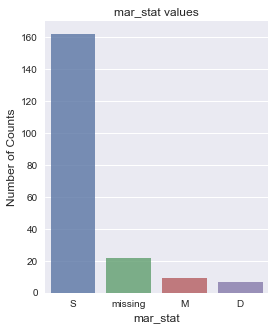

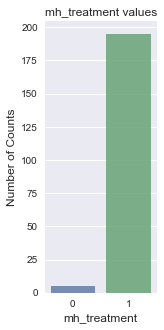

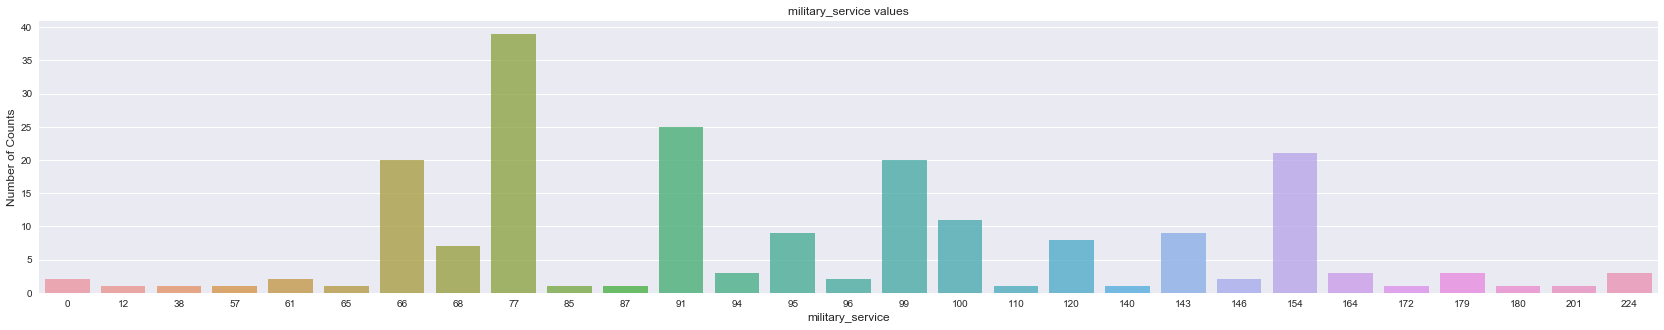

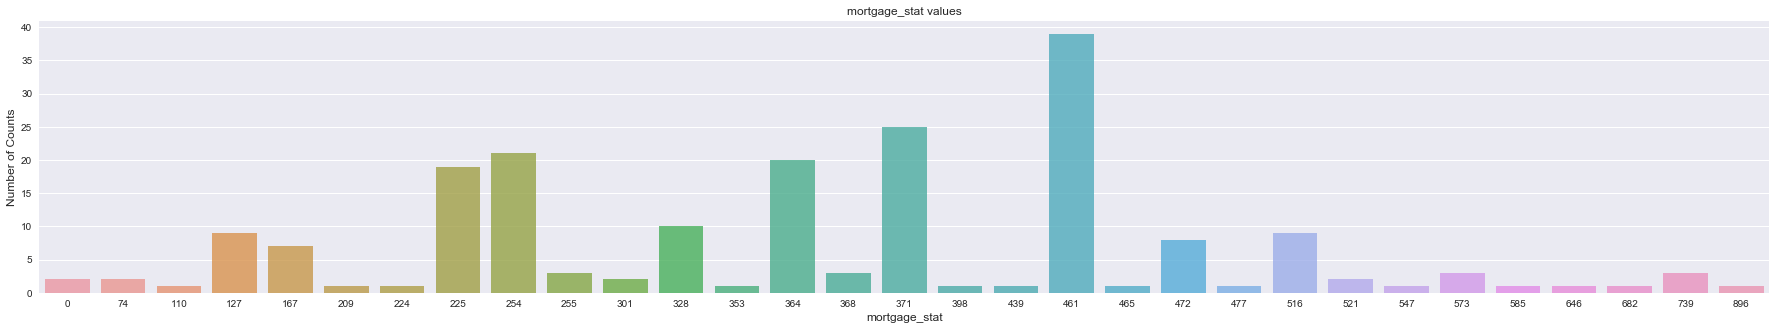

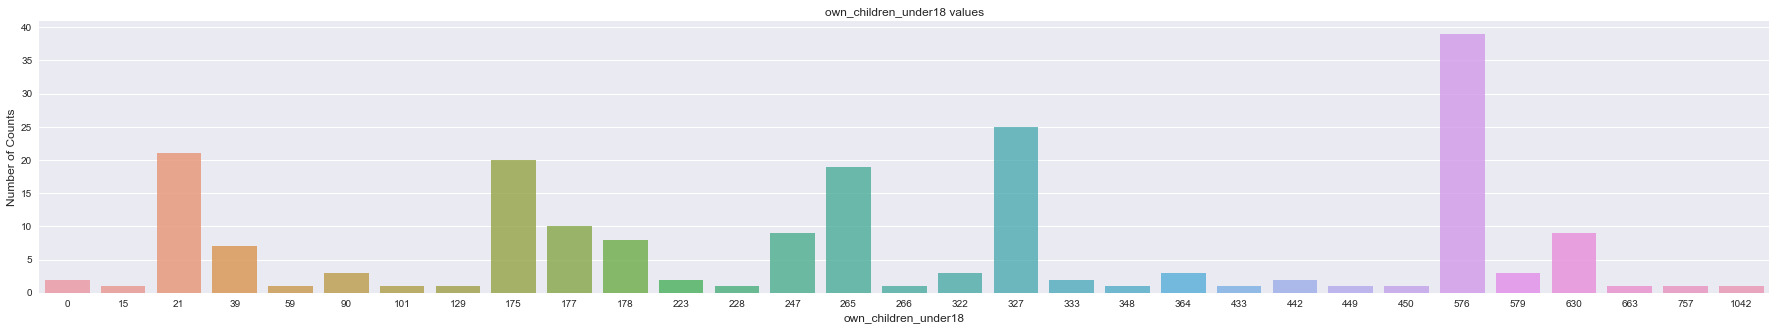

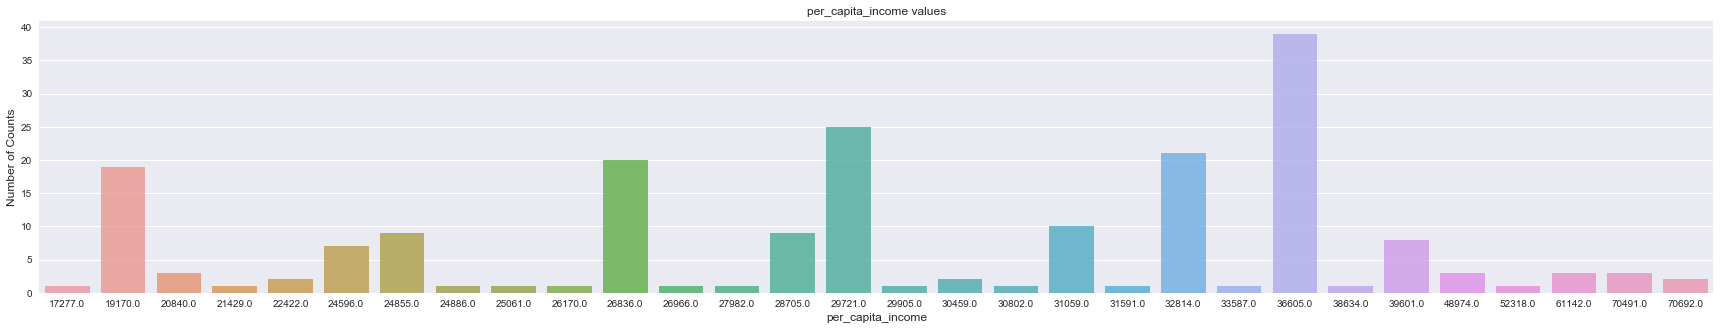

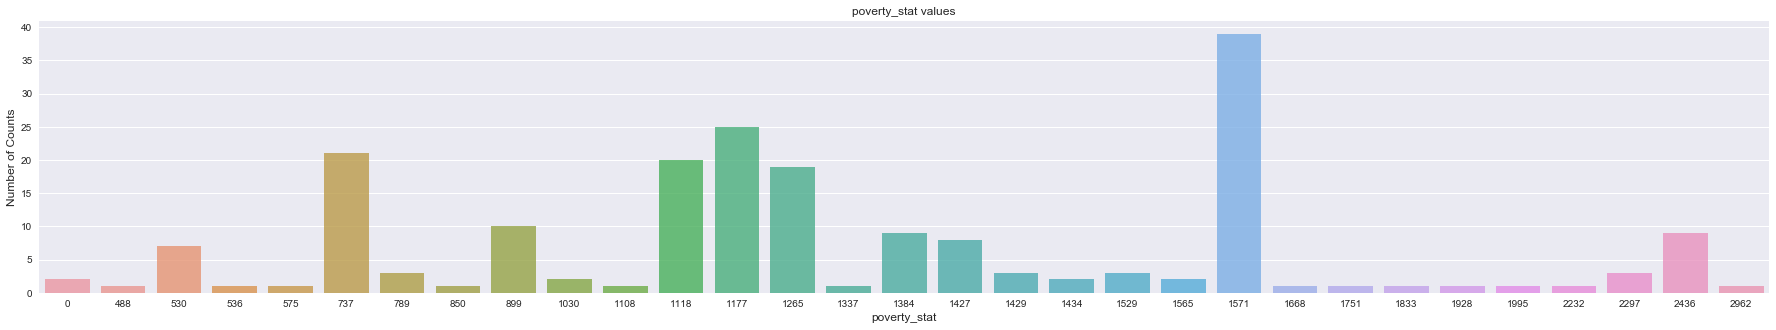

In [ ]:
final_plot.plot_df(RF_df2[:200], features_to_see, save=False)

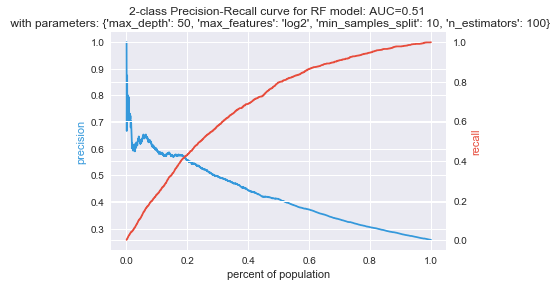

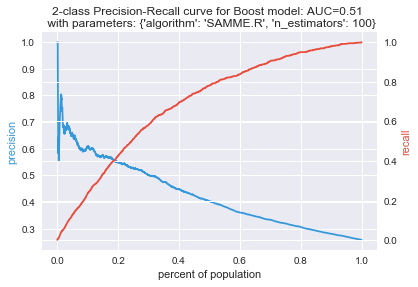

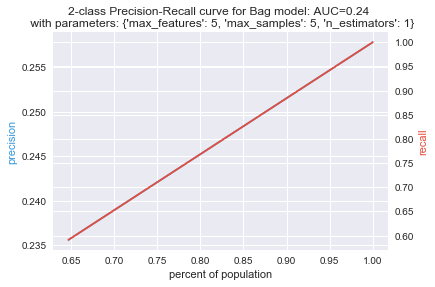

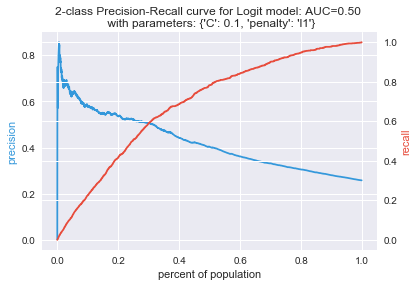

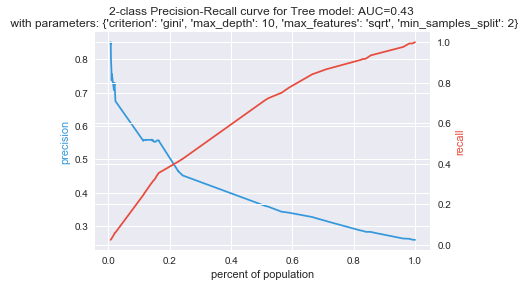

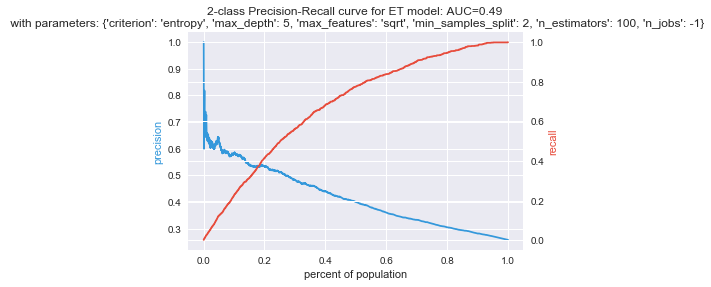

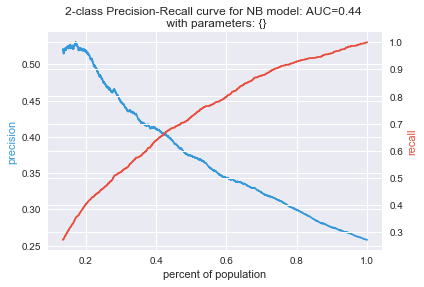

In [34]:
final_plot.plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"],  x_train, x_test, y_train['within_two'], y_test['within_two'], best)

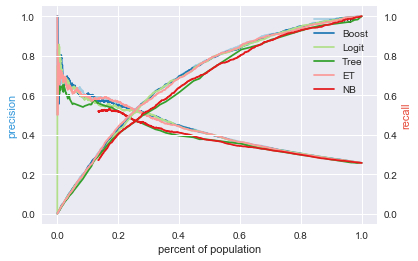

In [35]:
final_plot.plot_mult(['RF', 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'], best2)

Feature ranking for within_two
1. mh_treatment (0.076566)
2. pri_dx_valueUNSPECIFIED AFFECTIVE PSYCHOSIS (0.063764)
3. refferal_sourceOTHERS (0.052445)
4. bailed_out (0.035492)
5. bail_typeSUR (0.030084)
6. bail_amt_bin1 (0.026865)
7. refferal_sourceSELF (0.024235)
8. case_typeCR (0.022772)
9. bail_typePR (0.020811)
10. age_bin1 (0.019172)
11. case_typeDV (0.017885)
12. bail_amt_bin3 (0.016662)
13. mar_statS (0.015911)
14. age_bin4 (0.015746)
15. bail_amt_bin2 (0.015475)
16. sexMALE (0.014857)
17. sexFEMALE (0.014770)
18. mar_statM (0.014766)
19. bail_amt_bin4 (0.014575)
20. age_bin2 (0.014337)


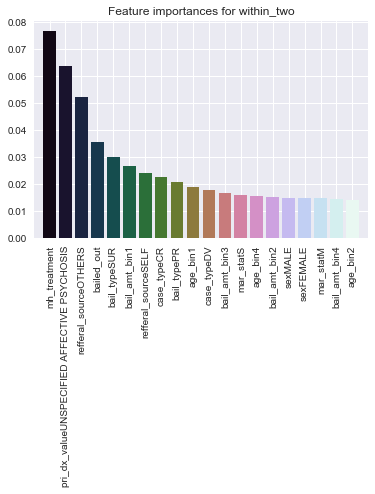

In [36]:
final_plot.feature_importance(x_train, y_train['within_two'], best2, "ET", 20)

In [37]:
################Print out the Decision Tree####################

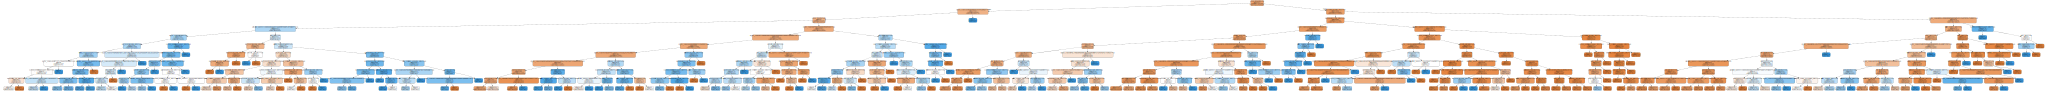

In [38]:
final_plot.print_tree(x_train, y_train["within_one"], best)